In [1]:
import requests # 웹 페이지 소스를 얻기 위한 패키지(기본 내장 패키지이다.)
from bs4 import BeautifulSoup # 웹 페이지 소스를 얻기 위한 패키지, 더 간단히 얻을 수 있다는 장점이 있다고 한다.
from datetime import datetime                                # (!pip install beautifulsoup4 으로 다운받을 수 있다.)
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지이다. (사이트가 늦게 켜지면 에러가 발생하기 때문)
import urllib.request #
from selenium.webdriver import Chrome
import json
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt
import os
import glob
from pandas import DataFrame


import matplotlib as mpl
import matplotlib.pylab as plt

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc('font',family = font_name)

In [40]:
r1 = pd.read_csv('HELLOUKY_IT18/result.csv', index_col = '날짜')

r1[r1["댓글"].str.contains("노트")]
 # r1["댓글"].str.contains("아이폰")

,닉네임,댓글,좋아요수
날짜,,,
['2020. 3. 20.'],사진찍는택시기사,전 남는 노트9이라도 구해야겟네요...,1개
['2020. 3. 20.'],KyuQ캡틴규큐,내 옆에 있는 아이패드 프로는 업체 미팅 때 잠시 사용하는 스마트 필기도구........,0개
['2020. 5. 8.'],안경유희,노트북 냉각팬 원리네,1개


In [3]:
# r1["count"] = r1["댓글"].str.contains("아이폰")
# r1

,닉네임,댓글,좋아요수,count
날짜,,,,
['2020. 5. 31.'],노을빛창가,0:10 서티는 30,2개,False
['2020. 5. 31.'],아름다운갤워치액티브,아냐 안찾았어 다시 들어가 내눈썩어,2개,False
['2020. 5. 31.'],웰시코기,아 내누 아..내눈..아ㅏㅏㅏㅏㅏㅏ내눈!,1개,False
['2020. 5. 31.'],월리,13에서 포트 싹다 없앤다는 말이 계속 들려서 불안....,1개,False
['2020. 5. 31.'],이정호,네이비블루 되게 고급스럽고 이쁜거같아용,1개,False
...,...,...,...,...
['2020. 5. 22.'],109이승엽25번,까비...2빠,1개,False
['2020. 5. 22.'],월리,아이폰에 소니센서는 원래 안들어갔었나요?,1개,True
['2020. 5. 22.'],109이승엽25번,"일본,중국에서 만든 카메라여도 11보다는 좋은거겠죠?",1개,False


In [4]:
# list1 = np.array(r1["댓글"].str.contains("아이폰"))
# list1*1
# r1["count2"] = list1*1
# r1

,닉네임,댓글,좋아요수,count,count2
날짜,,,,,
['2020. 5. 31.'],노을빛창가,0:10 서티는 30,2개,False,0
['2020. 5. 31.'],아름다운갤워치액티브,아냐 안찾았어 다시 들어가 내눈썩어,2개,False,0
['2020. 5. 31.'],웰시코기,아 내누 아..내눈..아ㅏㅏㅏㅏㅏㅏ내눈!,1개,False,0
['2020. 5. 31.'],월리,13에서 포트 싹다 없앤다는 말이 계속 들려서 불안....,1개,False,0
['2020. 5. 31.'],이정호,네이비블루 되게 고급스럽고 이쁜거같아용,1개,False,0
...,...,...,...,...,...
['2020. 5. 22.'],109이승엽25번,까비...2빠,1개,False,0
['2020. 5. 22.'],월리,아이폰에 소니센서는 원래 안들어갔었나요?,1개,True,1
['2020. 5. 22.'],109이승엽25번,"일본,중국에서 만든 카메라여도 11보다는 좋은거겠죠?",1개,False,0


In [18]:

pdf=r1.pivot_table("count2", "날짜", aggfunc="sum")
pdf

KeyError: 'count2'

In [16]:
# r1.pivot_table("count", "날짜", aggfunc="count")

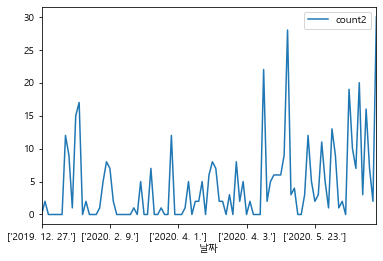

In [15]:
ax = pdf.plot()

# ax.scatter(pdf["날짜"],pdf["count2"])
# ax.set_title("아이폰 빈도수")
# ax.set_xlabel("날짜")
# ax.set_ylabel("빈도수")

In [1]:
# df = pd.DataFrame(np.random.randint(low = -3, high =3, size = (3, 3)))


# df.loc[df[0] == 0, 'count'] = 0


# df['count'].fillna(1, inplace = True)

NameError: name 'pd' is not defined

# 여기부터가 시작 ~~~~~~~~

In [41]:
## 댓글 파일이 있는 유튜버만 만들어주세요.
df = pd.read_csv('뷰티리스트.csv',encoding='cp949')
name_list = df['이름'].values
name_list
allData = []
for name in name_list:
     df = pd.read_csv(f'{name}/result.csv')
     allData.append(df)
      
dataCombine = pd.concat(allData,axis =0, ignore_index = True)
dataCombine.to_csv('test.csv', index = False, encoding = 'utf-8-sig')

In [42]:
testdf = pd.read_csv('test.csv',index_col = '날짜')
testdf

,닉네임,댓글,좋아요수
날짜,,,
['2020. 6. 2.'],권현수,윈도우 홈피에서 '지금 업데이트'와 도구 다운로드 후 팝업창에서 나오는 ' 이 PC...,2개
['2020. 6. 2.'],OwenOh,설치 usb로 만들면 그 버전도 최신 2004 버전으로 만들어지는건가요? 아님 업데...,0개
['2020. 6. 2.'],cota,왜 업데이트가 안 될까 했는데 툴이 필요했군요. \n아직은 IE로 페이지사 열리는 ...,2개
['2020. 6. 2.'],luckyclassic,코타나 버튼 생겨서 한국어 지원하는줄 알았는데 그냥 버튼만 생긴거였네요ㅠㅠ,0개
['2020. 5. 13.'],조범준,참 잘나왔는데 skt한정으로만 나온게 너무나도 아쉬운 모델...,4개
...,...,...,...
['2020. 3. 8.'],히릿,석회는 크게 몸에 문제는 없지 않나요?,0개
['2020. 3. 8.'],쿵쾅,안녕하세요 영상 잘 봤어요!!\n컨텐츠 하나 꼭 보고싶은게 있습니다\n큐플레이를 오...,2개
['2020. 3. 8.'],ZERO,가열식 가습기에 구연산으로 세척방법은 많이 알려져있어서 잘알고있는데 판매페이지에 문...,0개


In [43]:
list_ = np.array(testdf["댓글"].str.contains("노트"))
list_*1
testdf["count2"] = list_*1
testdf

,닉네임,댓글,좋아요수,count2
날짜,,,,
['2020. 6. 2.'],권현수,윈도우 홈피에서 '지금 업데이트'와 도구 다운로드 후 팝업창에서 나오는 ' 이 PC...,2개,0
['2020. 6. 2.'],OwenOh,설치 usb로 만들면 그 버전도 최신 2004 버전으로 만들어지는건가요? 아님 업데...,0개,0
['2020. 6. 2.'],cota,왜 업데이트가 안 될까 했는데 툴이 필요했군요. \n아직은 IE로 페이지사 열리는 ...,2개,0
['2020. 6. 2.'],luckyclassic,코타나 버튼 생겨서 한국어 지원하는줄 알았는데 그냥 버튼만 생긴거였네요ㅠㅠ,0개,0
['2020. 5. 13.'],조범준,참 잘나왔는데 skt한정으로만 나온게 너무나도 아쉬운 모델...,4개,0
...,...,...,...,...
['2020. 3. 8.'],히릿,석회는 크게 몸에 문제는 없지 않나요?,0개,0
['2020. 3. 8.'],쿵쾅,안녕하세요 영상 잘 봤어요!!\n컨텐츠 하나 꼭 보고싶은게 있습니다\n큐플레이를 오...,2개,0
['2020. 3. 8.'],ZERO,가열식 가습기에 구연산으로 세척방법은 많이 알려져있어서 잘알고있는데 판매페이지에 문...,0개,0


In [44]:

pdf=testdf.pivot_table("count2", "날짜", aggfunc="sum")
pdf

,count2
날짜,
['2019. 12. 27.'],0
['2019. 12. 9.'],0
['2020. 1. 21.'],0
['2020. 1. 23.'],0
['2020. 1. 25.'],0
...,...
['2020. 5. 8.'],4
['2020. 5. 9.'],11
['2020. 6. 1.'],10


Text(0.5, 1.0, "'노트'키워드 댓글 날짜별 빈도수")

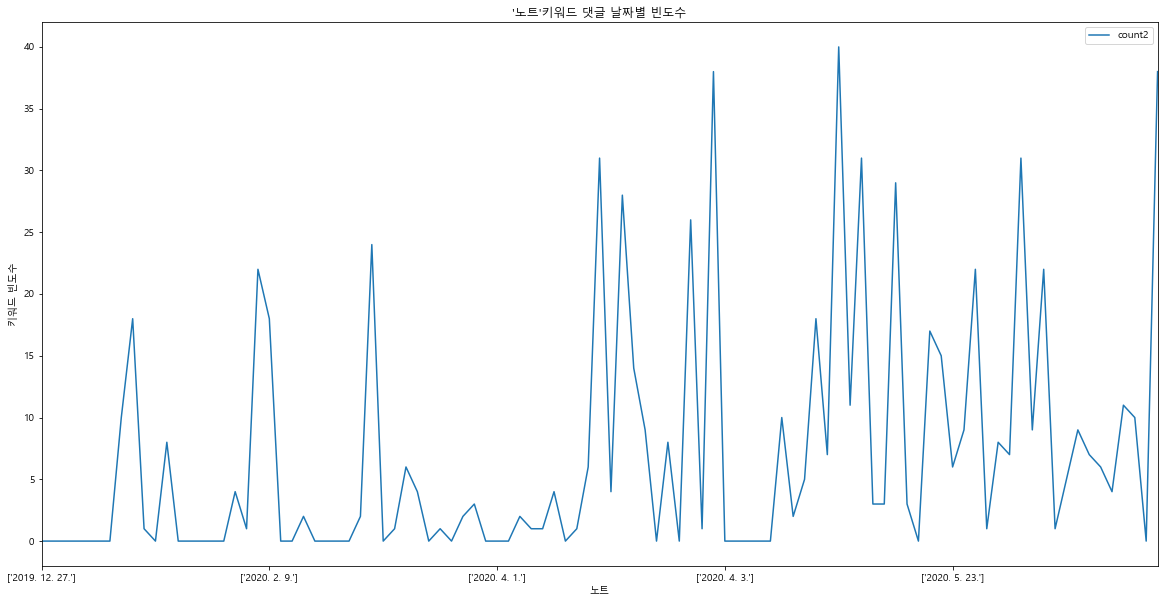

In [45]:
# ['[\'2019. 12. 27.\']','[\'2020. 1. 23.\']','[\'2020. 5. 8.\']','[\'2020. 6. 2.\']']
ax = pdf.plot(figsize =(20,10))
# ax.set_xticks(test)
plt.xlabel('노트')
plt.ylabel('키워드 빈도수')
plt.title('\'노트\'키워드 댓글 날짜별 빈도수')
